# MATH 405/607 

# Chaos In The Context Of Dynamical Systems

Callum Hepworth, Sandy Luo, Jed Yeo


## Content

1) Introduction to Chaos Theory
2) Strange Attractor & Lorenz Problem
3) Popular Examples of Chaos
4) Studying Chaos Numerically (ODEs)

## Introduction

- Chaos theory 
    - "Study of random or unpredictable behaviour in systems governed by deterministic laws" [1]
    - Example: Pinball machine
- Applications
    - Turbulent flow
    - Chemical reactions
    - Planetary motion

- Dynamical systems
    - Highly sensitive to initial conditions
    - i.e, adjusting initial conditions by some amount leads to interesting changes in the solution
    - Behavior of dynamical chaotic systems appears random
    - This is not the case - these systems are deterministic (future dynamics are fully defined by initial conditions)

## Lorenz Heat Problem

- Chaos first observed by Edward Lorenz in 1963 
- The problem: atmospheric convection (three ODEs):

$$\frac{dx}{dt} = \sigma(y-x), \frac{dy}{dt}=x(\rho-z)-y, \frac{dz}{dt}=xy-\beta z $$


- These three equations relate the properties of a 2D fluid layer uniformly warmed from below and cooled from above
- $x$ is proportional to rate of convection, $y$ to horizontal temperature gradient, $z$ to the vertical gradient
- Constants depend on physical properties of the system



In [1]:
# We take σ = 10, ρ = 28, β = 8/3
include("math405.jl")
using OrdinaryDiffEq, Plots
function lorenz(du,u,p,t)
    du[1] = 10.0*(u[2]-u[1])
    du[2] = u[1]*(28.0-u[3]) - u[2]
    du[3] = u[1]*u[2] - (8/3)*u[3]
end

lorenz (generic function with 1 method)

┌ Warning: To maintain consistency with solution indexing, keyword argument vars will be removed in a future version. Please use keyword argument idxs instead.
│   caller = ip:0x0
└ @ Core :-1


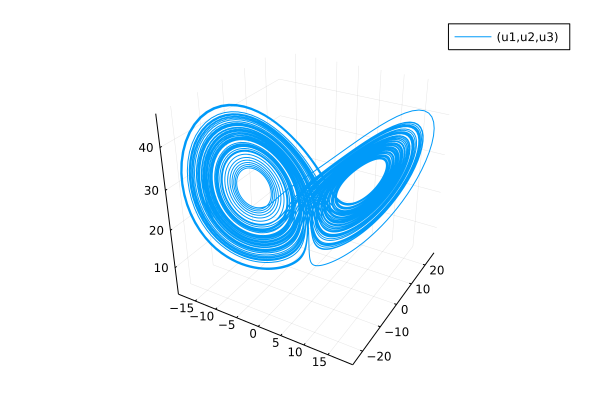

In [2]:
u0 = [-15.0;-15.0;20.0]
tspan = (0.0,100.0)
prob = ODEProblem(lorenz,u0,tspan)
sol = solve(prob, Tsit5())
plot(sol,vars=(1,2,3))

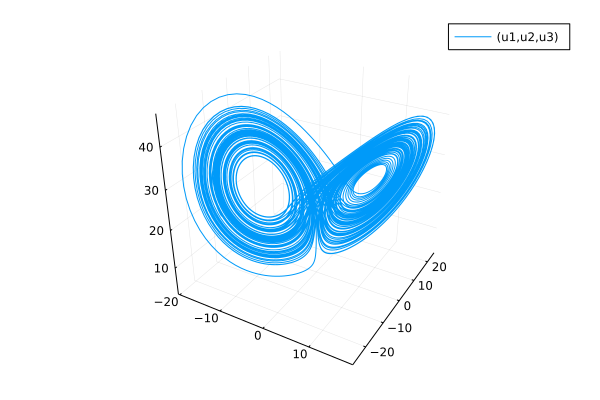

In [15]:
u1 = [-15.0;-15.0;20.0001]
prob = ODEProblem(lorenz,u1,tspan)
sol = solve(prob, Tsit5())
plot(sol,vars=(1,2,3))

- These butterfly-like shapes reveal the structure of the "stranger attractor" for the Lorenz problem
- A mere adjustment of $1\times10^{-4}$ in the third initial condition yields a vastly different solution space

- Lorenz's choices for $\beta = \frac{8}{3}$, $\sigma = 10$, and $\rho = 28$ were intentional.

- With these parameters almost all IC's tend toward an invariant set of states as the system evolves numerically.

- For a general ODE this set of states is called an $\textbf{attractor}$, and if these states form a fractal they are called a $\textbf{strange attractor}$.

    - Because it's a notable example, the strange attractor that emerges from the Lorenz system is dubbed the $\textbf{Lorenz attractor}$.

- While the Lorenz attractor is perhaps the most famous strange attractors, these behaviours emerge from a variety of dynamical systems.

- Most often, but not always, strange attractors emerge from chaotic systems.

- As Jed mentioned in the introduction, a necessary condition of a chaotic system is that the behaviour of the system is heavily dependent on the choice of initial conditions.

## Sensitivity to Initial Conditions

- We can visualize this initial condition dependence by taking a dynamical system that is known to be chaotic, i.e. the Lorenz system with $\beta = \frac{8}{3}$, $\sigma = 10$, and $\rho = 28$, and perturb $z_0$.

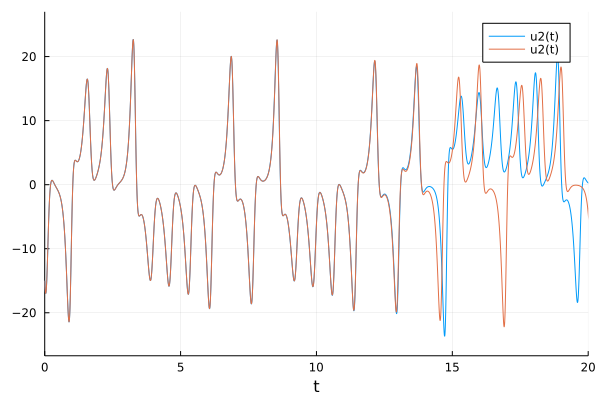

In [34]:
u1 = [-15.0;-15.0;20.0]
prob = ODEProblem(lorenz,u1,tspan)
sol_unperturbed = solve(prob, Tsit5())
plot(sol,vars=(1,2,3))

u1 = [-15.0;-15.0;20.00001]
prob = ODEProblem(lorenz,u1,tspan)
sol_perturbed = solve(prob, Tsit5())

plot(sol_unperturbed,vars=(2), color=1, xlims=(0, 20))
plot!(sol_perturbed,vars=(2), color=2, xlims=(0, 20))

- Despite having $z_0$ differ by one part in $10^6$, the systems diverge wildly after the $\approx 13^{th}$ timestep.

- Classical mechanics
    - Dynamical system's behavior can be described as motion on an “attractor".

## Popular Examples of Chaos

i love examples

- Rossler equations
- Chaotic nonlinear forced operator

In [5]:
example = 0

0

## Studying Chaos Numerically

- The process of solving chaotic problems numerically is no different from that of a regular ODE system
- e.g. the Lorenz problem is simply a system of 3 IVPs

In [6]:
study = 6

6